# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2022

## Homework 9
Due Wednesday, April 6

In [ ]:
using PyCall, PyPlot   # Packages needed

### Problem 1 - Data Structures and Runge 5 solver

First we will create some data structures for representing IVP problems and solutions.

#### Problem 1(a)

Define a `struct` named `IVPproblem` with the following variables and types:

* `f`, a `Function`
* `T`, a `Number`
* `y0`, a `Vector`

Define a `struct` named `IVPsolution` with the following variables and types:

* `t`, a `Vector`
* `y`, a `Matrix`

#### Problem 1(b)

Next, implement the following 5th order accurate Runge-Kutta method as a Julia function named `runge5` with the same syntax as the `rk4` function in the lecture notebook.

$$
\begin{align*}
k_1 &= h f(t_n, y_n) \\
k_2 &= h f(t_n + h/5, y_n + k_1/5) \\
k_3 &= h f(t_n + 2h/5, y_n + 2k_2/5) \\
k_4 &= h f(t_n + h, y_n + 9k_1/4 - 5k_2 + 15k_3/4) \\
k_5 &= h f(t_n + 3h/5, y_n - 63k_1/100 + 9k_2/5 - 13k_3/20 + 2k_4/25) \\
k_6 &= h f(t_n + 4h/5, y_n - 6k_1/25 + 4k_2/5 + 2k_3/15 + 8k_4/75) \\
y_{n+1} &= y_n + (17k_1 + 100k_3 + 2k_4 - 50k_5 + 75k_6) / 144
\end{align*}
$$

#### Problem 1(c)

Implement a function `runge5(ivp, N)` where `ivp` is of type `IVPproblem` and `N` is the
number of timesteps. The function should return the solution as a type `IVPsolutions`.
Do not rewrite any code from before, but simply call the previous function.

#### Problem 1(d)

* Create an `IVPproblem` for the differential equation $f(t,y)=-y$, $T=1$, $y(0)=1$.
* Solve using `runge5` with $N=10$ to obtain an `IVPsolution`
* Compute and show the differences between the computed solution and the true solution

### Problem 2 - Double pendulum

Next we will study the evolution of a double pendulum.
The state of the configuration at time $t$ is given by the angles
$\theta_1(t)$ and $\theta_2(t)$, see figure below.

<div>
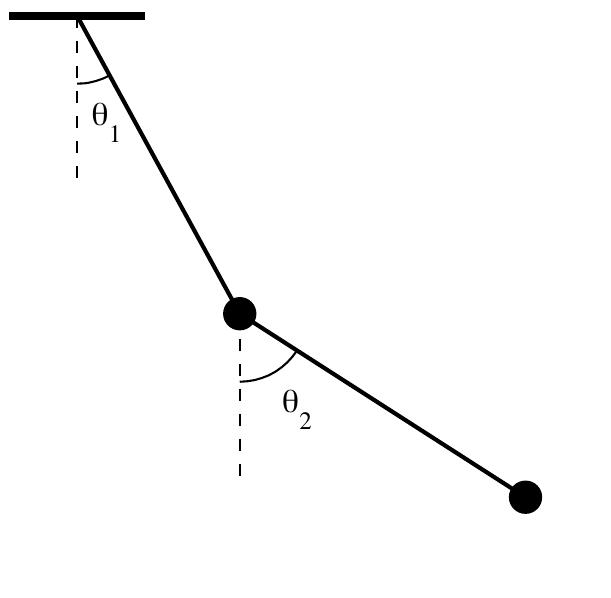
</div>

Assuming that the lengths of the bars are 1, the masses at the end of
the bars are 1, and that the constant of gravity is 1, the equations
of motion for the double pendulum can be written:

$$
\begin{align}
\theta_1''&=\frac{-3\sin\theta_1-\sin(\theta_1-2\theta_2)
-2\sin(\theta_1-\theta_2)\cdot(\theta_2'^2+\theta_1'^2\cos(\theta_1-\theta_2))}
{3-\cos(2\theta_1-2\theta_2)} \label{ode1} \\ 
\theta_2''&=\frac{2\sin(\theta_1-\theta_2)(2\theta_1'^2+2\cos\theta_1
+\theta_2'^2\cos(\theta_1-\theta_2))}{3-\cos(2\theta_1-2\theta_2)} \label{ode2}
\end{align}
$$

#### Problem 2(a)

Rewrite these as a system of 1st order equations by introducing the angular velocities $\omega_1=\theta_1'$ and
$\omega_2=\theta_2'$. The current state of the pendulum can then be described by the vector
$y=(\theta_1,\theta_2,\omega_1,\omega_2)$, and the 1st order
system can be written as $y' = f(t,y)$. Write a Julia function `fpend(t,y)` which evalutes this function.

#### Problem 2(b)

* Create an `IVPproblem` for the double pendulum problem, for the initial
condition $\theta_1 = \theta_2 = 2$, $\omega_1=0$, $\omega_2=-1$ and the final time $T=100$.

* Create an `IVPsolution` by solving using `runge5` and $N=500$.

* Plot the solution vs time (all four components $\theta_1(t)$, $\theta_2(t)$, $\omega_1(t)$, $\omega_2(t)$).

#### Animation (optional)

If you want to, run the cell below to create a movie of the evolving double pendulum and show it inside the notebook. It looks pretty cool, and can be quite useful for debugging your code.

To create the animation, call the function `anim` below with your `IVPsolution` as the only argument.

In [ ]:
@pyimport IPython.display as d
function anim(sol::IVPsolution)
    animation = pyimport("matplotlib.animation");
    fig, ax = subplots(figsize=(5,5))
    function update(frame)
        θ1 = sol.y[frame+1,1]
        θ2 = sol.y[frame+1,2]
        p1 = [sin(θ1),-cos(θ1)]
        p2 = p1 .+ [sin(θ2),-cos(θ2)]
        ax.clear()
        ax.plot([0,p1[1],p2[1]], [0,p1[2],p2[2]], linewidth=2)
        ax.add_artist(matplotlib.patches.Circle(p1, 0.1))
        ax.add_artist(matplotlib.patches.Circle(p2, 0.1))
        ax.set_xlim([-2.5,2.5])
        ax.set_ylim([-2.5,2.5])
    end

    ani = animation.FuncAnimation(fig, update, frames=length(sol.t), interval=50)
    close(ani._fig)
    d.HTML(ani.to_jshtml())
end